In [9]:
import torch
from torch import nn
from d2l import torch as d2l

In [10]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

初始化模型参数

In [ ]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

# randn 生成服从标准正态分布的随机数，即平均值0，标准差1
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)  
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [12]:
# 激活函数
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [13]:
# 模型
def net(X):
    X = X.reshape(-1, num_inputs)
    H = relu(X@W1+b1) # @代表矩阵乘法
    return (H@W2+b2)

In [14]:
# 损失函数
loss = nn.CrossEntropyLoss(reduction='none')

训练

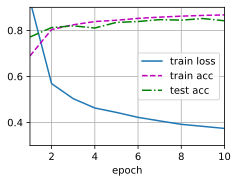

In [15]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

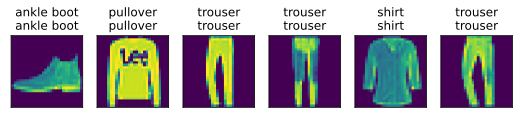

In [16]:
d2l.predict_ch3(net, test_iter)

练习

更改超参数num_hiddens的值

In [17]:
def my_train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    """Train a model (defined in Chapter 3).
    Defined in :numref:`sec_softmax_scratch`"""
    train_loss_record = []
    train_acc_record = []
    test_acc_record = []

    for epoch in range(num_epochs):
        train_loss, train_acc= d2l.train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = d2l.evaluate_accuracy(net, test_iter)

        train_loss_record.append(train_loss)
        train_acc_record.append(train_acc)
        test_acc_record.append(test_acc)
    
    print('train_loss_record: ', train_loss_record)
    print('train_acc_record: ', train_acc_record)
    print('test_acc_record: ', test_acc_record)


In [18]:
for num_hiddens in [2 ** i for i in range(1, 11)]:
    print("num_hiddens: ", num_hiddens)
    num_inputs, num_outputs, num_hiddens = 784, 10, 256

    # randn 生成服从标准正态分布的随机数，即平均值0，标准差1
    W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)  
    b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
    W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
    b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

    params = [W1, b1, W2, b2]

    num_epochs, lr = 10, 0.1
    updater = torch.optim.SGD(params, lr=lr)
    my_train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

num_hiddens:  2
train_loss_record:  [1.0363071378072102, 0.6017525746663411, 0.5177865645726522, 0.47778342107137045, 0.45046238352457685, 0.4330660296122233, 0.41480767040252686, 0.40075743630727134, 0.3893532730738322, 0.3793201887130737]
train_acc_record:  [0.6407166666666667, 0.7882333333333333, 0.8191833333333334, 0.8323333333333334, 0.84165, 0.8473166666666667, 0.8541666666666666, 0.8584333333333334, 0.8622666666666666, 0.8653166666666666]
test_acc_record:  [0.7366, 0.8049, 0.8053, 0.8205, 0.818, 0.8185, 0.8344, 0.8462, 0.8426, 0.8307]
num_hiddens:  4
train_loss_record:  [1.0435405986150106, 0.5988995360056559, 0.5189967772165934, 0.47948313433329265, 0.45700084851582845, 0.43703473052978514, 0.4169661319096883, 0.406027267074585, 0.3942918608983358, 0.38173904724121094]
train_acc_record:  [0.64835, 0.78845, 0.8185333333333333, 0.8324, 0.8397333333333333, 0.8462333333333333, 0.8534666666666667, 0.8572666666666666, 0.8609833333333333, 0.8651166666666666]
test_acc_record:  [0.7463,